In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import SVG, HTML, display
import tifffile as tiff
import glob
import os
import pandas as pd
from datetime import datetime

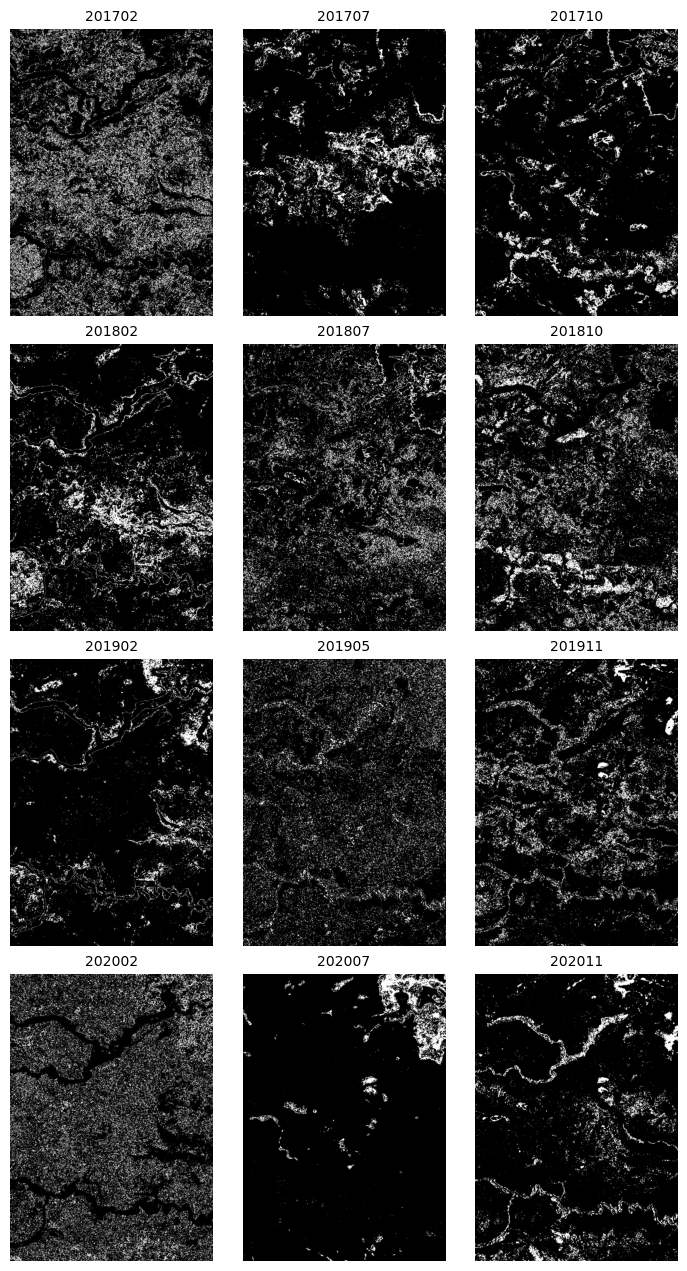

In [13]:
# Path to your TIFF files
tiff_files = sorted(glob.glob("./results/water/*.tif"))

# Create a figure with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(12, 16))
axes = axes.flatten()

# Loop through images and plot them
for i, file in enumerate(tiff_files):
    img = tiff.imread(file)

    # Extract the filename (without path)
    filename = os.path.basename(file)
    
    # Remove extension and take last 6 characters
    title_text = os.path.splitext(filename)[0][-6:]
    
    # Show the image
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title_text, fontsize=10)
    axes[i].axis('off')

# Hide unused axes (if fewer than 12 images)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(wspace=-0.5, hspace=0.1) 
plt.show()


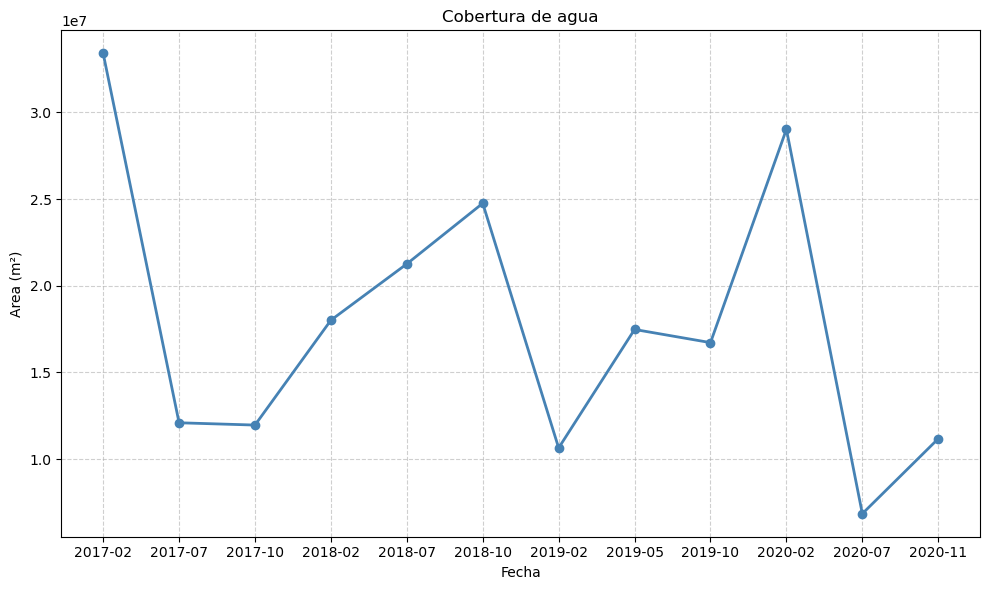

In [38]:
# Get all CSV files
csv_files = glob.glob("./results/*.csv")
#csv_files.sort(key=lambda f: datetime.strptime(os.path.basename(f)[:7], "%Y-%m"))

labels = []
areas_m2 = []

for file in csv_files:
    filename = os.path.basename(file)
    label = os.path.splitext(filename)[0][:7]
    
    df = pd.read_csv(file)
    
    # Convert the '1' column to numeric (remove commas, etc.)
    df['1'] = pd.to_numeric(df['1'].astype(str).str.replace(',', ''))
    
    area_m2= df['1'].iloc[0]
    
    labels.append(label)
    areas_m2.append(area_m2)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(labels, areas_m2, marker='o', color='steelblue', linewidth=2)
plt.title("Cobertura de agua")
plt.xlabel("Fecha")
plt.ylabel("Area (m²)")

# Format y-axis with commas
#plt.ticklabel_format(style='plain', axis='y')
#plt.gca().get_yaxis().set_major_formatter(
#plt.matplotlib.ticker.FuncFormatter(lambda x, p: f"{x:,.2f}"))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


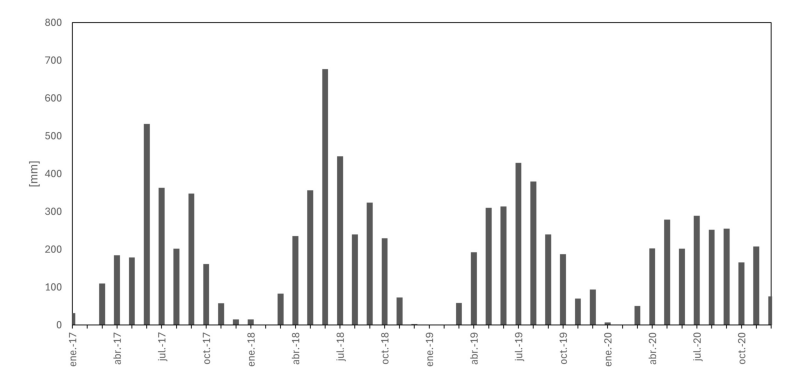

In [ ]:
img = mpimg.imread('./results/precip.jpg')
# Display smaller
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.show()